# Decision Tree

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('train.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df=df.drop("Name",axis=1)
df=df.drop("Ticket",axis=1)
df=df.drop("Cabin",axis=1)

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [11]:
imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]]).reshape(-1, 1)
df["Embarked"] = imputer.fit_transform(df[["Embarked"]]).reshape(-1, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 59.3 KB


In [12]:
corr=df.corrwith(df["Survived"]).abs().drop("Survived").sort_values(ascending=False)
newcorr=[j for i,j in enumerate(corr.items())]
X=pd.DataFrame(df[i[0]]for i in newcorr[:2]).T
X
y=df["Survived"]

In [13]:
frames = [X, y]
df = pd.concat(frames, axis=1)
df

,Sex,Pclass,Survived
0,1,3,0
1,0,1,1
2,0,3,1
3,0,1,1
4,1,3,0
...,...,...,...
886,1,2,0
887,0,1,1
888,0,3,0
889,1,1,1


<Axes: xlabel='Sex', ylabel='Pclass'>

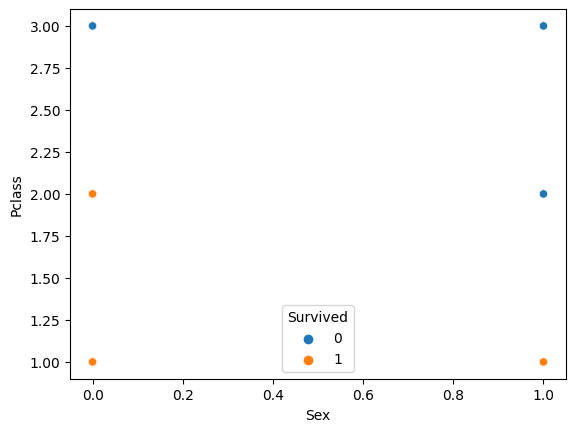

In [14]:
sns.scatterplot(x="Sex", y="Pclass", hue='Survived', data=df)

In [15]:
df_test = pd.read_csv('test.csv')
df_test=df_test.drop("Name",axis=1)
df_test=df_test.drop("Ticket",axis=1)
df_test=df_test.drop("Cabin",axis=1)
df_test=df_test.drop("PassengerId",axis=1)
df_test=df_test.drop("Age",axis=1)
df_test=df_test.drop("SibSp",axis=1)
df_test=df_test.drop("Parch",axis=1)
df_test=df_test.drop("Fare",axis=1)
df_test=df_test.drop("Embarked",axis=1)

df_test

,Pclass,Sex
0,3,male
1,3,female
2,2,male
3,3,male
4,3,female
...,...,...
413,3,male
414,1,female
415,3,male
416,3,male


In [16]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        le = LabelEncoder()
        df_test[column] = le.fit_transform(df_test[column])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  418 non-null    int64
 1   Sex     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [17]:
y_test=pd.read_csv("gender_submission.csv")
y_test=y_test["Survived"]
X_test=df_test

X_train=df.drop(["Survived"],axis=1)
y_train=df["Survived"]

X_train=X_train[["Pclass","Sex"]]
X_test


,Pclass,Sex
0,3,1
1,3,0
2,2,1
3,3,1
4,3,0
...,...,...
413,3,1
414,1,0
415,3,1
416,3,1


In [18]:
min1, max1 = 0,1
min2, max2 = 1,3
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

C:\Users\prodi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


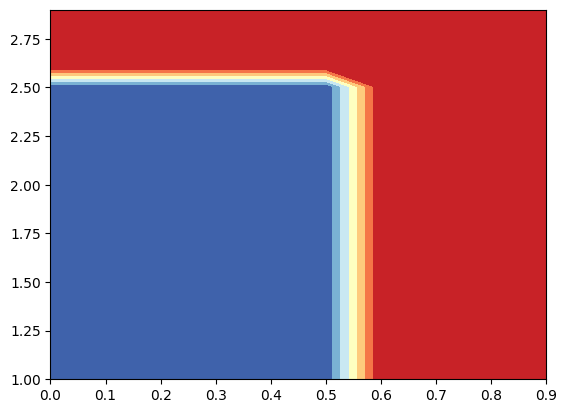

In [19]:
    clf = DecisionTreeClassifier().fit(X, y)
    plt.tight_layout(h_pad=0.2, w_pad=0.3, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

In [20]:
from sklearn.model_selection import cross_val_score

# Define the hyperparameters and their ranges
hyperparameters = [
    ("max_depth", range(1, 21)),
    ("min_samples_split", range(2, 21)),
    ("min_samples_leaf", range(1, 11)),
    ("min_weight_fraction_leaf", np.linspace(0.0, 0.5, 11)),
    ("max_features", np.arange(0.1, 1.1, 0.1)),
    ("max_leaf_nodes", range(2, 21)),
    ("min_impurity_decrease", np.arange(0.0, 0.6, 0.1))
]

best_hyperparameters = {}
best_accuracy = 0.0

for hyperparameter_name, hyperparameter_values in hyperparameters:
    accuracy_values = []
    for value in hyperparameter_values:
        # Create a Decision Tree model with the current hyperparameter setting
        clf = DecisionTreeClassifier(random_state=42)
        setattr(clf, hyperparameter_name, value)

        # Perform cross-validation and get the accuracy scores
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        accuracy = np.mean(scores)
        accuracy_values.append(accuracy)

    best_index = np.argmax(accuracy_values)
    best_value = hyperparameter_values[best_index]
    best_hyperparameters[hyperparameter_name] = best_value

    if accuracy_values[best_index] > best_accuracy:
        best_accuracy = accuracy_values[best_index]

# Train the model with the best hyperparameter setting
best_clf = DecisionTreeClassifier(random_state=42)
for param, value in best_hyperparameters.items():
    setattr(best_clf, param, value)
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set and print the accuracy
test_accuracy = best_clf.score(X_test, y_test)

# Print the best hyperparameters and their accuracies
for param, value in best_hyperparameters.items():
    print(f"Best {param}: {value}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Best max_depth: 1
Best min_samples_split: 2
Best min_samples_leaf: 1
Best min_weight_fraction_leaf: 0.2
Best max_features: 0.1
Best max_leaf_nodes: 2
Best min_impurity_decrease: 0.1
Best Accuracy: 0.7867365513778168
Test Accuracy: 0.6363636363636364


Cross-Validation Accuracy: 0.6161634548992531
Test Accuracy: 0.6363636363636364


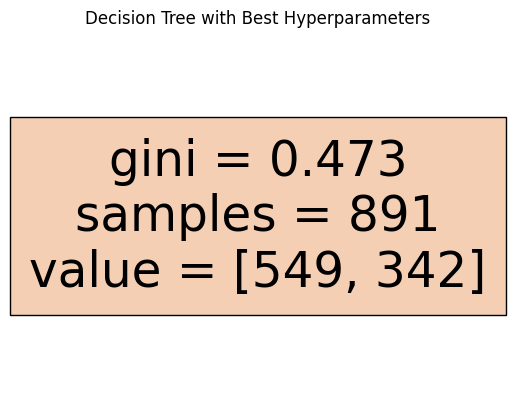

In [21]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

best_clf = DecisionTreeClassifier(random_state=12)
for name, value in best_hyperparameters.items():
    setattr(best_clf, name, value)

# Perform stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=cv)

# Calculate the average accuracy from cross-validation
cv_accuracy = np.mean(cv_scores)

# Train the model on the full training set
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracies
print("Cross-Validation Accuracy:", cv_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot the decision tree
plot_tree(best_clf, filled=True)
plt.title("Decision Tree with Best Hyperparameters")
plt.show()
